Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, ttest_ind, pearsonr
import statsmodels.api as sm

Reading the file into a dataframe 

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url, index_col=0)

Description of the dataset:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [3]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


Exploratory Data Analysis

In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 55.3 KB


Number of rows: 506
Number of columns: 13
No null values, value count is same for each column.
Data type is float64 format in all columns.

Descriptive Statistics of the dataset

In [5]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Visualization exercises

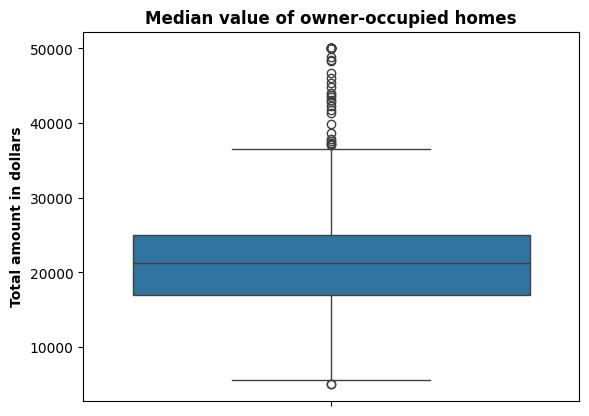

In [6]:
# Visualization 1
# "Median value of owner-occupied homes" provide a boxplot

vis1 = sns.boxplot(y=boston_df["MEDV"] * 1000)
plt.title("Median value of owner-occupied homes", fontweight="bold")
plt.ylabel("Total amount in dollars", fontweight="bold")
plt.show()


Total amount is displayed instead of amount in 1000$ units. The data must be old, as the maximum amount is 50000$, which is not realistic in 2024.
The median value is 21200$ as shown in descriptive statistics table above.
There are many outliers after third quartile.

C:\Users\janka\AppData\Local\Temp\ipykernel_21992\3250938211.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  vis2.set_xticklabels(["Not Bound to River", "Bound to River"])


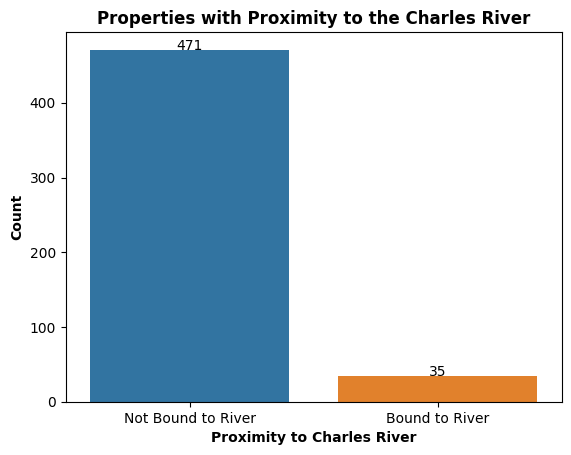

In [7]:
# Visualization 2
# Provide a  bar plot for the Charles river variable

close_to_river_counts = boston_df["CHAS"].value_counts()
vis2 = sns.barplot(x=close_to_river_counts.index, y=close_to_river_counts.values, hue=close_to_river_counts.index, legend=False)

plt.title("Properties with Proximity to the Charles River", fontweight="bold")
plt.xlabel("Proximity to Charles River", fontweight="bold")
plt.ylabel("Count", fontweight="bold")

vis2.set_xticklabels(["Not Bound to River", "Bound to River"])

for index, value in enumerate(close_to_river_counts):
    plt.text(index, value + 0.1, str(value), ha='center')

# Show the plot
plt.show()

The house samples in dataset are mostly not bound to the Charles river (more than 90%).
Thus, less than 10% of samples are bound to the river.

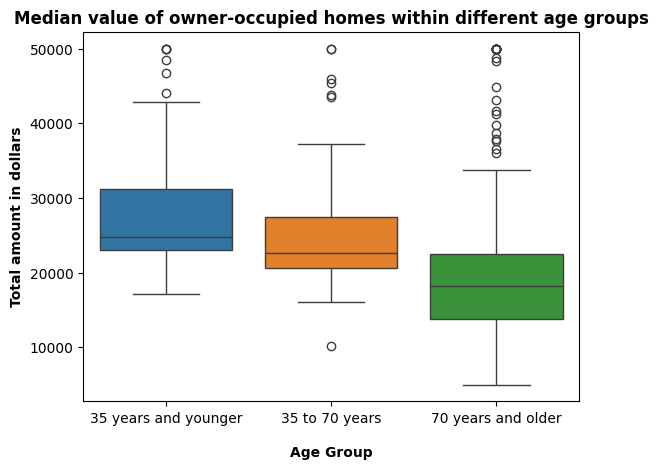

In [8]:
# Visualization 3
# Provide a boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df["Age group"] = pd.cut(boston_df["AGE"], bins=[0, 35, 70, float('inf')], labels=["35 years and younger", "35 to 70 years", "70 years and older"])

vis3 = sns.boxplot(x=boston_df["Age group"], y=boston_df["MEDV"] * 1000, data=boston_df, hue=boston_df["Age group"], legend=False)

plt.title("Median value of owner-occupied homes within different age groups", fontweight="bold")
plt.xlabel("Age Group", labelpad=15, fontweight="bold")
plt.ylabel("Total amount in dollars", fontweight="bold")

plt.show()

Total amount is displayed instead of amount in 1000$ units. 
The older the house, the less the median price of it, which makes sense. 
However, there are a lot of outliers with regard to "70 years and older" age group, which could be due to different reasons (for example how big the house is, which area is it located, etc. We will see the factors with further analysis.)

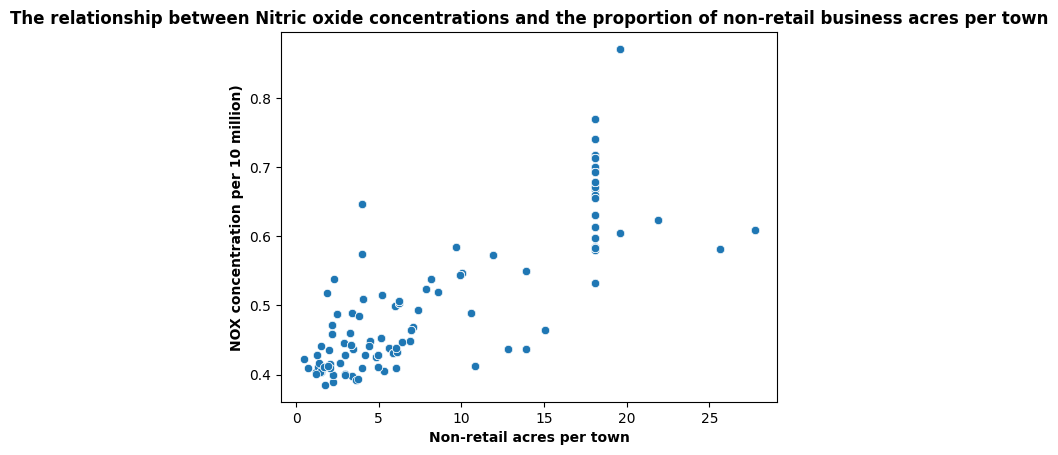

In [9]:
# Visualization 4
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
# What can you say about the relationship?

vis4 = sns.scatterplot(x=boston_df["INDUS"], y=boston_df["NOX"])

plt.title("The relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town", fontweight="bold")
plt.xlabel("Non-retail acres per town", fontweight="bold")
plt.ylabel("NOX concentration per 10 million)", fontweight="bold")

plt.show()

# INDUS - proportion of non-retail business acres per town.
# NOX - nitric oxides concentration (parts per 10 million)

There is a trend of increasing Nitric oxide concentrations with higher proportions of industrial areas of town, which means the pollution is visibly greater there.
However, pollution due to traffic in busy areas could explain higher values for non-industrial parts as well.

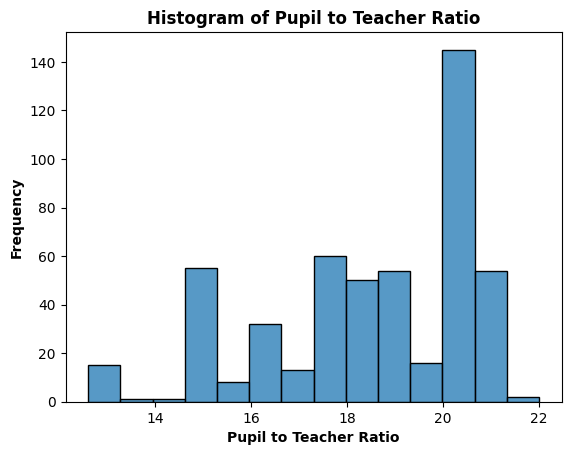

In [10]:
# Visualization 5
# Create a histogram for the pupil to teacher ratio variable

vis5 = sns.histplot(x=boston_df["PTRATIO"])

plt.title("Histogram of Pupil to Teacher Ratio", fontweight="bold")
plt.xlabel("Pupil to Teacher Ratio", fontweight="bold")
plt.ylabel("Frequency", fontweight="bold")

plt.show()

Distribution is skewed to the left.
Lower ratio might indicate wealthier areas, would be interesting to check whether there is a correlation between MEDV and PTRATIO columns.

Statistical tests

Is there a significant difference in the median value of houses bounded by the Charles river or not?

To compare the means of the distributions, t-test is used.
The null hypothesis states there is no difference in the median value of houses with respect of the proximity of the river.
The alternative hypothesis states there is a difference in the median value of houses with respect of the proximity of the river.
alpha = 0.05

As p-value is less than alpha value, we reject the null hypothesis, in other words there is statistical significance.

In [11]:
river_bounded = boston_df[boston_df["CHAS"] == 1]["MEDV"]
not_river_bounded = boston_df[boston_df["CHAS"] == 0]["MEDV"]

statistic, p_value = ttest_ind(river_bounded, not_river_bounded)

alpha = 0.05

if p_value < alpha:
    print("There is a significant difference.")
else:
    print("There is no significant difference.")

There is a significant difference.


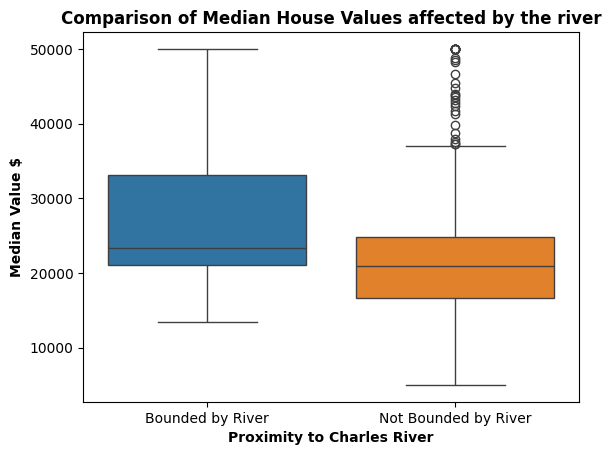

In [12]:
data = pd.DataFrame({
    "Median Value": np.concatenate([river_bounded*1000, not_river_bounded*1000]),
    "Bounded by River": ["Bounded by River"] * len(river_bounded) + ["Not Bounded by River"] * len(not_river_bounded)
})

sns.boxplot(x="Bounded by River", y="Median Value", data=data, hue="Bounded by River")
plt.title("Comparison of Median House Values affected by the river", fontweight="bold")
plt.ylabel("Median Value $", fontweight="bold")
plt.xlabel("Proximity to Charles River", fontweight="bold")

plt.show()

Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

alpha = 0.05
The null hypothesis states there is no difference between the groups being compared.
The alternative hypothesis states that there is a difference between the groups.

The null hypothesis is rejected. There is a statistically significant difference in median house values across the different age groups.

In [13]:
group_35_younger = boston_df[boston_df["Age group"] == "35 years and younger"]["MEDV"]
group_35_to_70 = boston_df[boston_df["Age group"] == "35 to 70 years"]["MEDV"]
group_70_older = boston_df[boston_df["Age group"] == "70 years and older"]["MEDV"]


anova_result = f_oneway(group_35_younger, group_35_to_70, group_70_older)

formatted_p_value = "{:.15f}".format(p_value)
print("ANOVA p-value:", formatted_p_value)

ANOVA p-value: 0.000073906231705


Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

alpha = 0.05
The null hypothesis states there is no relationship relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
The alternative hypothesis states that there is a relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

We reject the null hypothesis as p-value is smaller than the assumed significance level.
There is a correlation between nitric oxid concentrations and industrial areas.


In [14]:
x = boston_df["NOX"].to_numpy()
y = boston_df["INDUS"].to_numpy()

res = pearsonr(x, y)
print(res)
formatted_p_value = "{:.100f}".format(res.pvalue)
print(formatted_p_value)


PearsonRResult(statistic=0.7636514469209157, pvalue=7.91336106123623e-98)
0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000791


What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

The null hypothesis states there is no relationship between weighted distance to the five Boston employment centres on the median value of owner-occupied homes.
The alternative hypothesis states that there is a relationship between weighted distance to the five Boston employment centres on the median value of owner-occupied homes.

alpha = 0.05


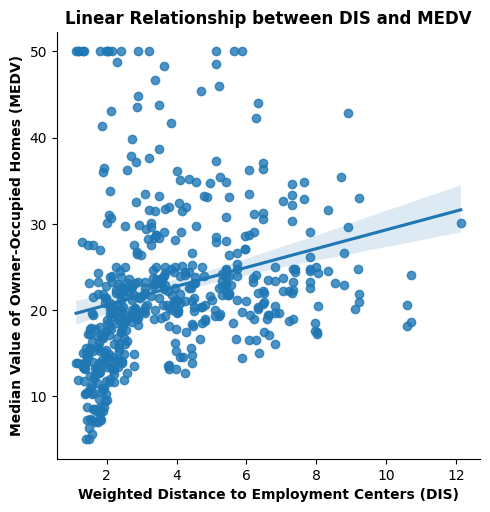

In [15]:
data = pd.DataFrame({'DIS': boston_df['DIS'], 'MEDV': boston_df['MEDV']})

sns.lmplot(x='DIS', y='MEDV', data=data)

plt.xlabel('Weighted Distance to Employment Centers (DIS)', fontweight="bold")
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)', fontweight="bold")
plt.title('Linear Relationship between DIS and MEDV', fontweight="bold")

plt.show()

In [16]:
X= data['DIS']
Y = data["MEDV"]

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     506.6
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           3.59e-78
Time:                        11:03:41   Log-Likelihood:                -1515.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     504   BIC:                             3044.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.8909      0.445     44.731      0.000      19.017      20.765
DIS           -2.3067      0.102    -22.508      0.000      -2.508      -2.105
==============================================================================
Omnibus:                        8.811   Durbin-Watson:                   0.200
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.066
Skew:                          -0.325   Prob(JB):                       0.0107
Kurtosis:                       2.919   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Prob F statistic is 1.21e-08 (close to zero). This tells the overall significance of regression. The null hypothesis is rejected.
Coefficient term: if X rises by 1 unit then Y rises by 1.0916. The more pricey the median value of a house, the further the distance from employment centers.